In [101]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
creditcard_df = pd.read_csv('credit-card-data.csv')
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [103]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [106]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS']= creditcard_df['MINIMUM_PAYMENTS'].mean()

In [107]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [108]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [109]:
creditcard_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [117]:
score_1 = []
range_values = range(1, 11)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled)
    score_1.append(kmeans.inertia_)

Text(0.5, 1.0, 'Find the right no of cluster')

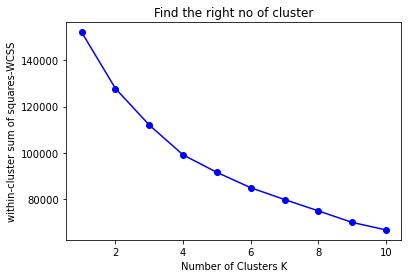

In [119]:
plt.plot(range_values,score_1, marker="o", color='b')
plt.xlabel('Number of Clusters K')
plt.ylabel('within-cluster sum of squares-WCSS')
plt.title('Find the right no of cluster')

In [120]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(creditcard_df_scaled)

In [121]:
creditcard_df['cluster'] = labels

In [122]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [123]:
creditcard_df['cluster'].value_counts()

2    3976
1    3367
3    1198
0     409
Name: cluster, dtype: int64

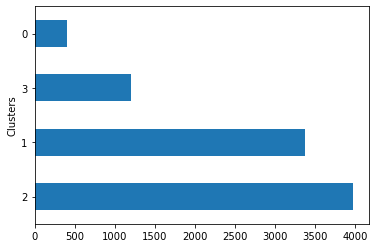

In [125]:
creditcard_df['cluster'].value_counts().plot(kind='barh')
plt.ylabel('Clusters')
plt.show()

In [126]:
cols = list(creditcard_df.columns)
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]

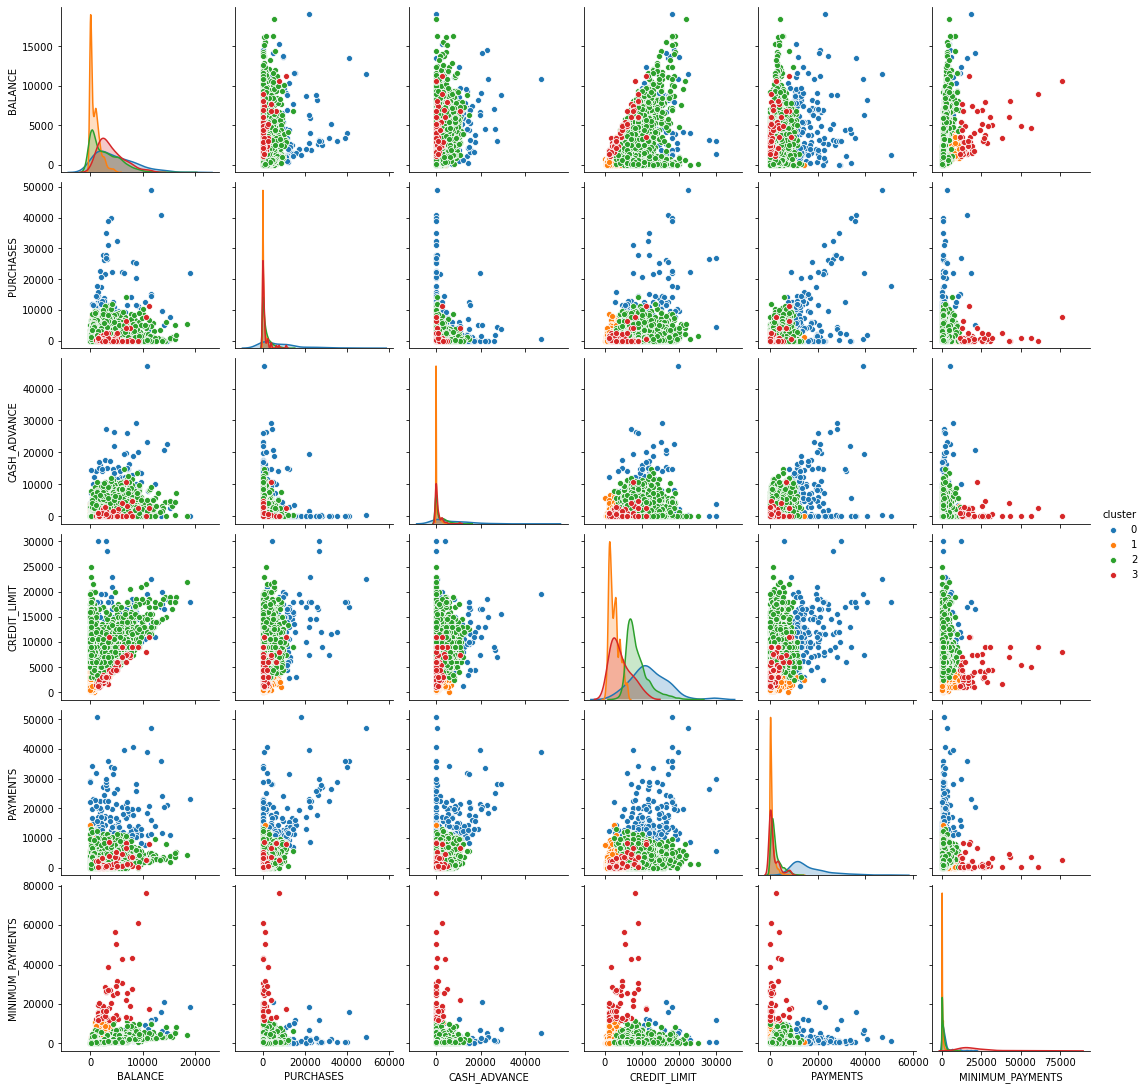

In [127]:
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
best_vals = creditcard_df[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

creditcard_df["cluster"] = y_pred
best_cols.append("cluster")
sns.pairplot( creditcard_df[ best_cols ], hue="cluster")

In [129]:
# Extract five new features

creditcard_df['MONTHLY_AVG_PURCHASES'] = creditcard_df['PURCHASES']/creditcard_df['TENURE']
creditcard_df['MONTHLY_CASH_ADVANCE'] = creditcard_df['CASH_ADVANCE']/creditcard_df['TENURE']
creditcard_df['LIMIT_USAGE'] = creditcard_df['BALANCE']/creditcard_df['CREDIT_LIMIT']
creditcard_df['MIN_PAYMENT_RATIO'] = creditcard_df['PAYMENTS']/creditcard_df['MINIMUM_PAYMENTS']

x = creditcard_df['ONEOFF_PURCHASES']
y = creditcard_df['INSTALLMENTS_PURCHASES']
purchase_type = []
for i, j in zip(x, y):
    if i==0 and j==0:
        purchase_type.append("None")
    elif i>0 and j>0:
        purchase_type.append("both")
    elif i>0 and j==0:
        purchase_type.append("oneoff")
    else:
        purchase_type.append("Installement")

creditcard_df['purchase_type'] = purchase_type

In [132]:
dumies = pd.get_dummies(creditcard_df['purchase_type'], prefix = "purchase_type")
creditcard_df = pd.concat([creditcard_df, dumies], axis=1)

In [133]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'cluster', 'MONTHLY_AVG_PURCHASES', 'MONTHLY_CASH_ADVANCE',
       'LIMIT_USAGE', 'MIN_PAYMENT_RATIO', 'purchase_type',
       'purchase_type_Installement', 'purchase_type_None',
       'purchase_type_both', 'purchase_type_oneoff'],
      dtype='object')

c:\python38\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


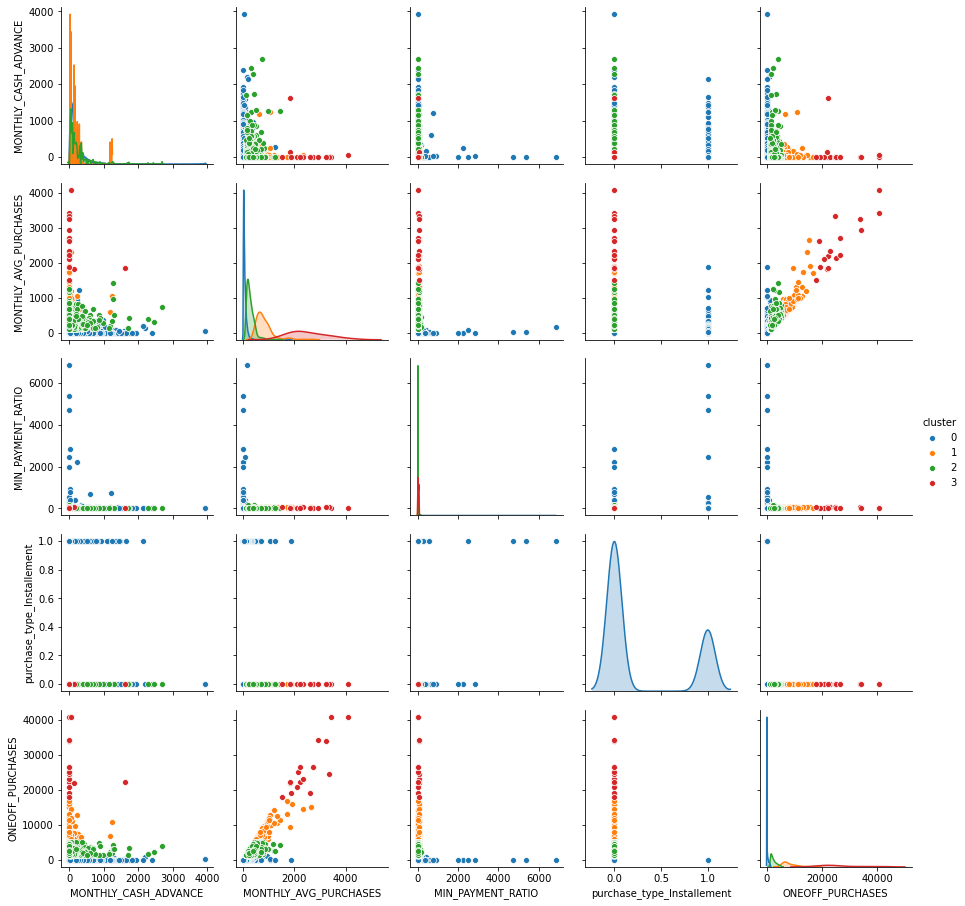

In [134]:
KPI_cols = ['MONTHLY_CASH_ADVANCE', 'MONTHLY_AVG_PURCHASES', 'MIN_PAYMENT_RATIO', 'purchase_type_Installement', 'ONEOFF_PURCHASES' ]

kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
KPI_vals = creditcard_df[KPI_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( KPI_vals )

creditcard_df["cluster"] = y_pred
KPI_cols.append("cluster")
sns.pairplot( creditcard_df[ KPI_cols ], hue="cluster")

In [139]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)

In [144]:
pca_df.cluster.value_counts()

2    3976
1    3367
3    1198
0     409
Name: cluster, dtype: int64

<Figure size 1440x1080 with 0 Axes>

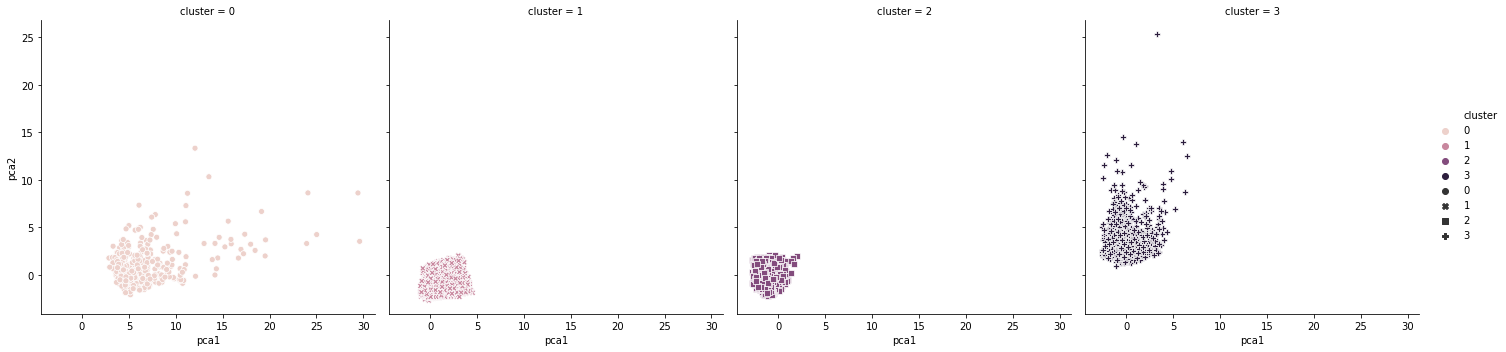

In [145]:
plt.figure(figsize= (20,15))
sns.relplot(
    data=pca_df, x="pca1", y="pca2",
    col="cluster", hue="cluster", style="cluster",
    kind="scatter"
)
plt.show()

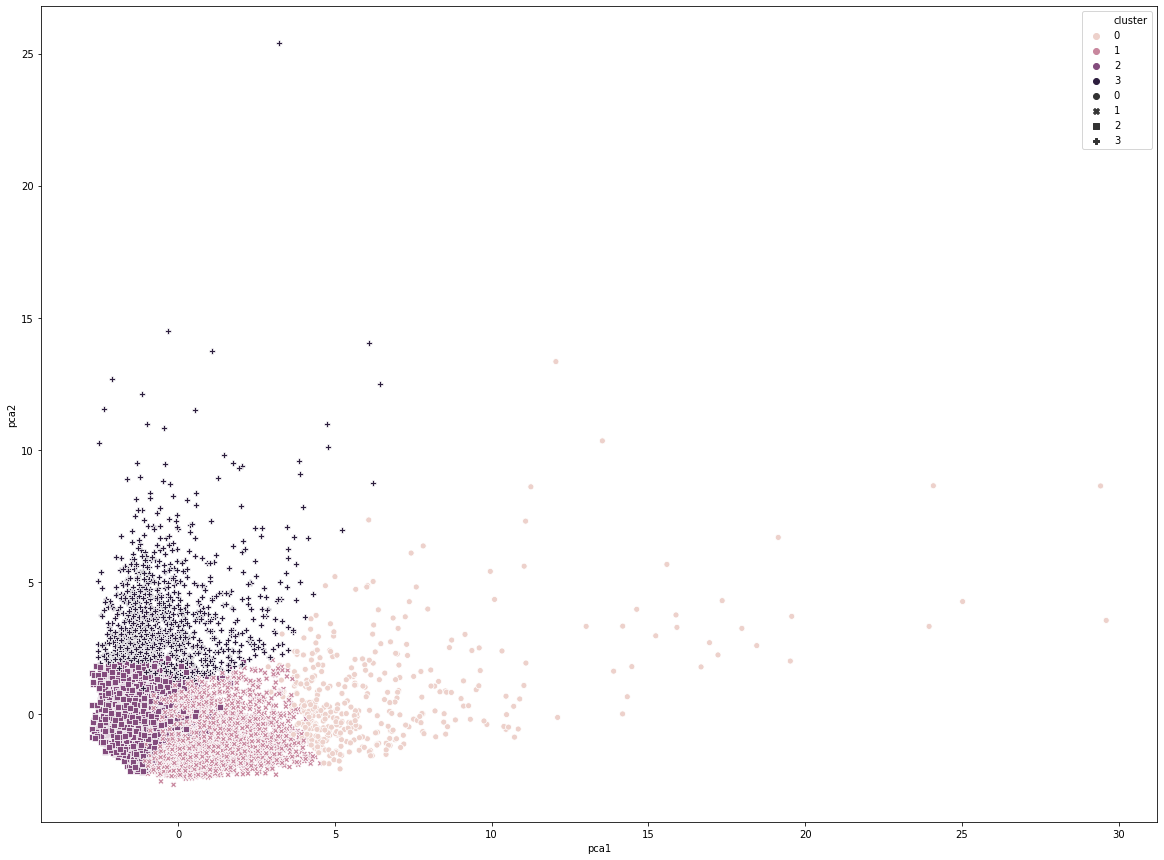

In [143]:
plt.figure(figsize= (20,15))
sns.scatterplot(data=pca_df, x="pca1", y="pca2", hue="cluster", style="cluster")
plt.show()